**Название проекта:**

Анализ программы лояльности магазина строительных материалов «Строили, строили и наконец построили»

**Цель исследования:**

Оценка результатов внедрения программы лояльности с целью ответа на вопрос о ее дальнейшем применении (исследование параметров данных, их зависимости между собой, анализ результатов проверки выбвинутых гипотез)


**Краткое описание проекта:**

Мы имеем данные о покупках в магазине строительных материалов «Строили, строили и наконец построили». Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

**Описание начальных данных:**

*Датасет retail_dataset.csv:*
- purchaseId — id чека;
- item_ID — id товара;
- purchasedate — дата покупки;
- Quantity — количество товара;
- CustomerID — id покупателя;
- ShopID — id магазина;
- loyalty_program — участвует ли покупатель в программе лояльности;

*Датасет product_codes.csv:*
- productID — id товара;
- price_per_one — стоимость одной единицы товара;


**Ход исследования:**

1. Загрузка данных и подготовка их к анализу
2. Предобработка данных
3. Функции для расчета и визуализации метрик
4. Исследовательский анализ данных
5. Анализ основных ритейл-метрик
6. Проверка гипотез 
7. Вывод и рекомендации

# 1. Загрузка данных и подготовка их к анализу

## Обзор данных

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import pylab
from plotly import graph_objects as go
import plotly.express as px
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from scipy import stats as st

In [ ]:
# загружаем данные о продажах
retail = pd.read_csv('/content/drive/MyDrive/ЯПрактикум - АЛЛА/Спринт 13. Выпускной проект/Проект РИТЕЙЛ/retail_dataset.csv')

In [ ]:
# загружаем данные о товаре
product = pd.read_csv('/content/drive/MyDrive/ЯПрактикум - АЛЛА/Спринт 13. Выпускной проект/Проект РИТЕЙЛ/product_codes.csv')

In [ ]:
# откроем таблицу retail и посмотрим общую информацию о ней
retail.info()
retail.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


In [ ]:
# откроем таблицу product и посмотрим общую информацию о ней
product.info()
product.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


**Обнаруженные проблемы:**
- датасет retail
  - заполним пропуски в столбце CustomerID
  - наименования столбцов, записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.
  - столбец с id товара переименуем на product_id
  - преобразуем тип в столбце purchasedate на дату
  - преобразуем тип в столбце loyalty_program на целочисленный
  - преобразуем тип в столбце CustomerID на объект
  - проверим на наличие дубликатов
  
  
- датасет product
  - столбец с id товара переименуем на product_id
  - проверим на наличие дубликатов

# 2. Предобработка данных

## Анализ выбросов и аномалий в данных

In [ ]:
# посмотрим на список характерных значений по столбцу с количеством товара в чеке
retail['Quantity'].describe()

count    105335.000000
mean          7.821218
std         327.946695
min      -74216.000000
25%           0.000000
50%           2.000000
75%           7.000000
max       74214.000000
Name: Quantity, dtype: float64

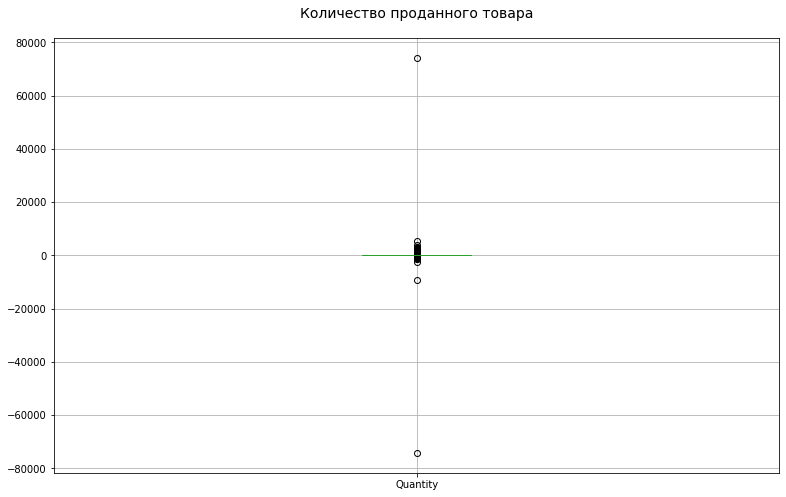

In [ ]:
# чтобы изучить особенности визуально, построим коробчатую диаграмму
plt.figure(figsize=(13, 8))
retail.boxplot(column=['Quantity'])
plt.title('Количество проданного товара', pad=20, fontsize=14);

In [ ]:
# посмотрим как много строк со значением ниже нуля
retail[retail['Quantity']<0]

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
64,C539944,22776,-2,2016-12-23 11:38:00,20239.0,Shop 0,0.0
109,C542910,20726,-2,2017-02-01 15:38:00,23190.0,Shop 0,1.0
112,C542426,22418,-25,2017-01-28 09:32:00,19825.0,Shop 0,0.0
253,C539726,22791,-11,2016-12-21 14:24:00,22686.0,Shop 0,1.0
344,C544034,21878,-2,2017-02-15 11:28:00,20380.0,Shop 0,0.0
...,...,...,...,...,...,...,...
105160,C541650,M,-2,2017-01-20 11:44:00,NaN,Shop 0,0.0
105172,C540246,79320,-2,2017-01-05 15:43:00,18760.0,Shop 0,0.0
105211,C539467,22801,-2,2016-12-19 12:46:00,20723.0,Shop 0,0.0
105250,C540847,22197,-3,2017-01-11 17:35:00,19137.0,Shop 0,0.0


Обнаружено 2118 строк с отрицательными значениями в столбце с количеством товара, что составляет 2% от общего объема данных. Это могут быть возвраты товара. Также видим выброс с более 70 тыс. товарами в одном чеке. Чтобы данные аномалии не искажали исследование, удалим их.

<div class = "alert alert-info">
Логика удаления выбросов с отрицательными значениями: В компаниях, которые продают товары, случаются возвраты. Возвраты должны учитываться в системе, т.е. вычитаться из первоначального чека (накладной, с/ф), как правило этим занимаются операторские центры или бухгалтеры, если компания большая, либо товароведы в точках продаж. Таким образом я предполагаю, что данные отрицательные значения "висят" в данных как учтенные (обработанные), поэтому мы их просто удалим.

In [ ]:
# посмотрим строку с 70 тыс. товарами в одном чеке
retail[retail['Quantity']>70000]

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
69074,541431,23166,74214,2017-01-18 10:01:00,18025.0,Shop 0,0.0


In [ ]:
# удалим аномальное количество товара c отрицательными значениями
retail=retail[retail['Quantity']>=0]

In [ ]:
# удалим строку с 70 тыс. товарами в одном чеке
retail=retail.query('index not in [69074]')

In [ ]:
# посмотрим на список характерных значений по столбцу с ценой за единицу товара из датафрейма product
product['price_per_one'].describe()

count     9969.000000
mean        19.503697
std        330.880754
min          0.000000
25%          1.250000
50%          2.550000
75%          5.510000
max      16888.020000
Name: price_per_one, dtype: float64

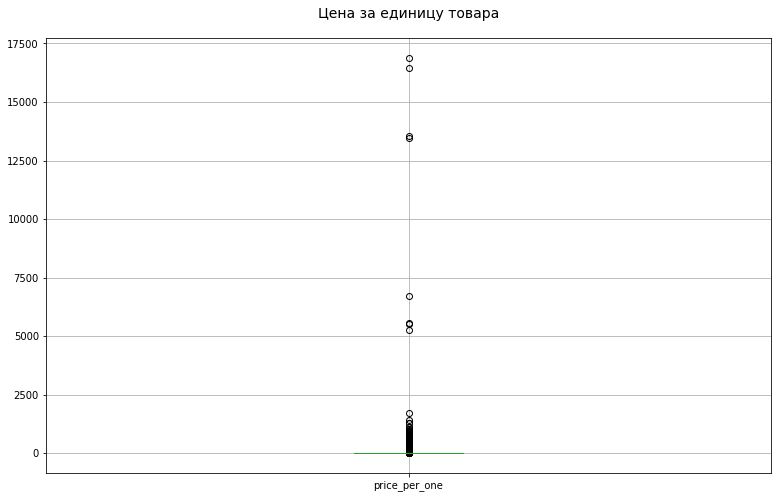

In [ ]:
# чтобы изучить особенности визуально, построим коробчатую диаграмму
plt.figure(figsize=(13, 8))
product.boxplot(column=['price_per_one'])
plt.title('Цена за единицу товара', pad=20, fontsize=14);

In [ ]:
# посмотрим какой именно это товар
product[product['price_per_one']>2500]

,productID,price_per_one
3931,AMAZONFEE,13541.33
4089,AMAZONFEE,13474.79
4094,AMAZONFEE,5519.25
4095,AMAZONFEE,6706.71
6133,AMAZONFEE,16888.02
6134,AMAZONFEE,16453.71
9732,AMAZONFEE,5575.28
9733,AMAZONFEE,5258.77


In [ ]:
# проверим, есть ли в датасете retail товар с кодом "AMAZONFEE" 
retail[retail['purchaseid'].isin(['AMAZONFEE'])] 

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program


In [ ]:
# удалим выбросы
product=product.query('index not in [3931,4089,4094,4095,6133,6134,9732,9733]')

Доп проверка показала, что товары с id "AMAZONFEE" удалены как выбросы из датасета retail, таким образом пересейчений нет. Поэтому товары с кодом "AMAZONFEE" также удалим.

In [ ]:
# посмотрим на цены за единицу товара 
product['productID'].value_counts()

DOT      174
M         59
S         29
POST      15
D         13
        ... 
21750      1
71215      1
20695      1
22820      1
20738      1
Name: productID, Length: 3159, dtype: int64

Видим, что один и тот же товар мог иметь вариативную цену за весь период. По ряду sku цены менялись до 174(!) раз. Здесь можно было бы посчитать средневзвешенную цену, но т.к. в датасете отсутствуют данные по количеству проданного товара по каждой цене, это сделать невозможно. В данном случае считаю необходимо прибегнуть к медианному расчету.

In [ ]:
# для каждого товара выведем медианное значение цены за единицу
product_m = (product.groupby('productID')['price_per_one'].agg('median').sort_values(ascending=False).reset_index())
product_m.head()

,productID,price_per_one
0,22655,265.50
1,DOT,198.19
2,22826,175.00
3,22828,155.00
4,22827,155.00


## Обработка пропусков

In [ ]:
# проверим данные датасета retail на наличие пропусков в %
pd.DataFrame(round(retail.isna().mean()*100)).style.background_gradient('coolwarm')

,0
purchaseid,0.000000
item_ID,0.000000
Quantity,0.000000
purchasedate,0.000000
CustomerID,35.000000
ShopID,0.000000
loyalty_program,0.000000


Обнаружены пропуски в столбце с id покупателя (35%), возможно это покупки, совершенные покупателями без сетевой карты. Поставим заглушку.

In [ ]:
# заменим пропуски в столбце CustomerID на '0'
retail['CustomerID'] = retail['CustomerID'].fillna(0)

## Изменение типов данных

In [ ]:
# замeним тип данных в столбце loyalty_program на целочисленный
retail['loyalty_program'] = retail['loyalty_program'].astype('bool')

In [ ]:
# замeним тип данных в столбце CustomerID на объект
retail['CustomerID'] = retail['CustomerID'].astype('object')

In [ ]:
# преобразуем данные о времени
retail['purchasedate'] = pd.to_datetime(retail['purchasedate'])

## Обработка названий столбцов

In [ ]:
# приведем названия столбцов в таблицах в соответствие с хорошим стилем
retail = retail.rename(columns={
    'purchaseid': 'purchase_id',
    'item_ID': 'product_id',
    'Quantity': 'quantity',
    'purchasedate': 'purchase_date',
    'CustomerID': 'customer_id',
    'ShopID': 'shop_id'
})

product_m = product_m.rename(columns={
    'productID': 'product_id'
})

## Обработка дубликатов

In [ ]:
# проверим датасет retail на наличие дубликатов
retail.duplicated().sum()

991

In [ ]:
# посмотрим на найденные дубликаты
duplicateRows = retail[retail.duplicated()]
duplicateRows.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
5345,537265,21499,24,2016-12-06 11:26:00,21598.0,Shop 0,False
5863,540803,21485,0,2017-01-11 12:30:00,20348.0,Shop 0,False
6893,540524,21326,11,2017-01-09 12:53:00,22414.0,Shop 0,True
7821,537192,22585,0,2016-12-05 13:42:00,22081.0,Shop 0,True
10806,537772,22080,4,2016-12-08 12:35:00,23722.0,Shop 0,True


In [ ]:
# посмотрим сколько магазинов вошло в дублирующие строки
duplicateRows['shop_id'].value_counts()

Shop 0     981
Shop 25      4
Shop 6       2
Shop 4       2
Shop 18      1
Shop 2       1
Name: shop_id, dtype: int64

Почти все дубли по магазину Shop 0

In [ ]:
# удалим дубликаты
retail = retail.drop_duplicates()

In [ ]:
# проверим датасет product на наличие дубликатов
product_m.duplicated().sum()

0

## Дополнительные столбцы

In [ ]:
# добавим в таблицу день, день недели и месяц
retail['dt'] = retail['purchase_date'].dt.date
retail['weekday'] = retail['purchase_date'].dt.weekday
retail['month'] = retail['purchase_date'].astype('datetime64[M]')
retail['year_week'] = retail['purchase_date'].dt.strftime('%Y-%U')
retail['rating_rank'] = retail['year_week'].rank(method ='dense').astype('int')

## Проверка изменений

In [ ]:
# перепроверим чтобы все изменения "подтянулись" корректно
retail.info()
retail.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102225 entries, 0 to 105334
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      102225 non-null  object        
 1   product_id       102225 non-null  object        
 2   quantity         102225 non-null  int64         
 3   purchase_date    102225 non-null  datetime64[ns]
 4   customer_id      102225 non-null  object        
 5   shop_id          102225 non-null  object        
 6   loyalty_program  102225 non-null  bool          
 7   dt               102225 non-null  object        
 8   weekday          102225 non-null  int64         
 9   month            102225 non-null  datetime64[ns]
 10  year_week        102225 non-null  object        
 11  rating_rank      102225 non-null  int64         
dtypes: bool(1), datetime64[ns](2), int64(3), object(6)
memory usage: 9.5+ MB


,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,dt,weekday,month,year_week,rating_rank
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,False,2016-12-10,5,2016-12-01,2016-49,2
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,True,2016-12-14,2,2016-12-01,2016-50,3
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,True,2016-12-14,2,2016-12-01,2016-50,3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,True,2017-02-09,3,2017-02-01,2017-06,10
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,True,2017-02-13,0,2017-02-01,2017-07,11


In [ ]:
# перепроверим чтобы все изменения "подтянулись" корректно
product_m.info()
product_m.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


,product_id,price_per_one
0,22655,265.50
1,DOT,198.19
2,22826,175.00
3,22828,155.00
4,22827,155.00


В данном разделе были обнаружены и обработаны:
- выбросы в датасете retail (аномальное количество проданного товара) и в датасете product (артикулы с аномальной ценой за единицу товара)
- пропуски в столбце ['CustomerID'] датасета retail
- изменены типы данных
- исправлены наименования столбцов
- дубликаты
- добавлены дополнительные столбцы

# 3. Функции для расчета и визуализации метрик

## Функция для создания пользовательских профилей

In [ ]:
def get_profiles(retail):
    # найдем параметры первых покупок
    # сортируем продажи по ID покупателя и дате покупки
    # группируем по ID и находим первые значения purchase_date и loyalty_program
    # столбец с временем первого посещения назовём first_purchase_date
    profiles = (retail
            .sort_values(by=['customer_id', 'purchase_date'])
            .groupby('customer_id')
            .agg({'purchase_date': 'first', 'loyalty_program': 'first'})
            .rename(columns={'purchase_date': 'first_purchase_date'})
            .reset_index()) # возвращаем customer_id из индекса
    
    # для когортного анализа определяем дату первой покупки
    # и первый день месяца, в который эта покупка произошла
    profiles['dt'] = profiles['first_purchase_date'].dt.date
    profiles['month'] = profiles['first_purchase_date'].astype('datetime64[M]')

    # добовляем столбцы с порядковым номером недел
    profiles['first_year_week'] = profiles['first_purchase_date'].dt.strftime('%Y-%U')
    profiles['first_rating_rank'] = profiles['first_year_week'].rank(method ='dense').astype('int')
    
    # считаем количество уникальных пользователей с одинаковой датой первой покупки
    new_customer_id = (profiles
                       .groupby('first_purchase_date')
                       .agg({'customer_id': 'nunique'})
                       .rename(columns={'customer_id': 'unique_customer_id'})
                       .reset_index())
    return profiles

In [ ]:
profiles = get_profiles(retail)
# добавим к таблице с профилями столбцы с порядковым номером недели
profiles['first_year_week'] = profiles['first_purchase_date'].dt.strftime('%Y-%U')
profiles['first_rating_rank'] = profiles['first_year_week'].rank(method ='dense').astype('int')

profiles.head()

,customer_id,first_purchase_date,loyalty_program,dt,month,first_year_week,first_rating_rank
0,0.0,2016-12-01 11:52:00,False,2016-12-01,2016-12-01,2016-48,1
1,18026.0,2016-12-07 14:57:00,False,2016-12-07,2016-12-01,2016-49,2
2,18027.0,2016-12-16 19:09:00,False,2016-12-16,2016-12-01,2016-50,3
3,18029.0,2017-02-02 16:01:00,False,2017-02-02,2017-02-01,2017-05,9
4,18031.0,2017-02-16 12:33:00,False,2017-02-16,2017-02-01,2017-07,11


## Функция для расчёта удержания

In [ ]:
def get_retention(
    profiles,
    retail,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец loyalty_program в передаваемый dimensions список
    dimensions = ['loyalty_program'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    
    # добавим к таблице с профилями столбцы с порядковым номером недели
    profiles['first_year_week'] = profiles['first_purchase_date'].dt.strftime('%Y-%U')
    profiles['first_rating_rank'] = profiles['first_year_week'].rank(method ='dense').astype('int')

    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        retail[['customer_id', 'purchase_date']], on='customer_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['purchase_date'] - result_raw['first_purchase_date']
    ).dt.days

    # рассчитываем удержание
    # новый вариант с dimensions
    result_grouped = result_raw.pivot_table(
        index=dimensions,  # заменили dt
        columns='lifetime',
        values='customer_id',
        aggfunc='nunique',
    )
    cohort_sizes = (
        result_raw.groupby(dimensions)  # заменили dt
        .agg({'customer_id': 'nunique'})
        .rename(columns={'customer_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'  # заменили dt
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

## Функция для расчёта LTV

In [ ]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    total,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
        
    # добавим к таблице с профилями столбцы с порядковым номером недели
    profiles['first_year_week'] = profiles['first_purchase_date'].dt.strftime('%Y-%U')
    profiles['first_rating_rank'] = profiles['first_year_week'].rank(method ='dense').astype('int')
    
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        total[['customer_id', 'purchase_date', 'revenue']],
        on='customer_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['purchase_date'] - result_raw['first_purchase_date']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All customers'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 3. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 4. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 5. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'customer_id': 'nunique'})
            .rename(columns={'customer_id': 'cohort_size'})
        )

        # Шаг 6. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 7. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

В данном разделе были написаны функции для расчета retention и LTV, расчеты представлены в 5 разделе.

# 4. Исследовательский анализ данных

## Определение периода исследования

In [ ]:
# найдем минимальную и максимальную даты периода
min_date = retail['dt'].min()
max_date = retail['dt'].max()
'Временные рамки: начало - {}, конец - {}'.format(min_date, max_date)

'Временные рамки: начало - 2016-12-01, конец - 2017-02-28'

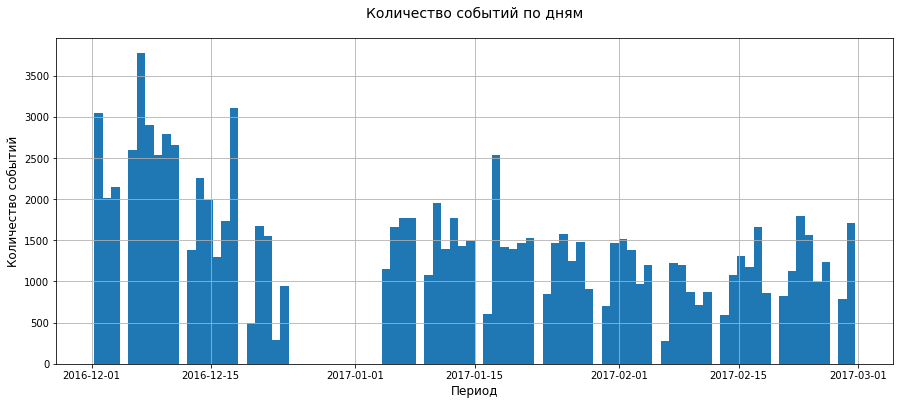

In [ ]:
# построим гистограмму по дате
# число корзин подберем по количеству дней = 90 дн
plt.figure(figsize=(15,6))
retail['purchase_date'].hist(bins=90)

plt.title('Количество событий по дням', pad=20, fontsize=14)
plt.xlabel("Период", fontsize=12)
plt.ylabel("Количество событий", fontsize=12);

У нас в распоряжении данные за три месяца продаж, что достаточно для формирования выводов и рекомендаций по проведенной программе лояльности. Однако часть периода без данных, вероятно по причине длительных новогодних каникул. 

## Исследование профиля покупателя

In [ ]:
# вычислим сколько всего уникальных покупателей
customer_id_cnt = retail['customer_id'].nunique()
'Всего уникальных покупателей: {}'.format(customer_id_cnt)

'Всего уникальных покупателей: 1682'

In [ ]:
# рассмотрим соотношение уникальных покупателей в период проведения программы лояльности
loyalty_customer_id_ratio = retail.pivot_table(index='loyalty_program', values='customer_id', aggfunc='nunique')
loyalty_customer_id_ratio['ratio'] = round(loyalty_customer_id_ratio['customer_id']/loyalty_customer_id_ratio['customer_id'].sum(),2)
loyalty_customer_id_ratio

,customer_id,ratio
loyalty_program,,
False,1117,0.66
True,565,0.34


In [ ]:
# построим график
name_loyalty = ['не участник', 'участник']

fig = go.Figure(data=[go.Pie(labels=name_loyalty, # указываем значения, которые появятся на метках сегментов
                            values=loyalty_customer_id_ratio['ratio'], # указываем данные, которые отобразятся на графике
                            pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Cоотношение уникальных покупателей', # указываем заголовок графика
                 width=500, # указываем размеры графика
                 height=500,
                 annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                   y=1.05,
                                   text='Тип покупателя',
                                   showarrow=False)])
fig.show() # выводим график


Всего 34% покупателей Сети стали участниками программы лояльности. Скорее всего заказчик намеренно предлагал участие в программе лояльности ограниченному числу пользователей.

In [ ]:
# строим таблицу с профилем покупателя
profiles = (retail
            .sort_values(by=['customer_id', 'purchase_date'])
            .groupby('customer_id')
            .agg({'purchase_date': 'first', 'loyalty_program': 'first'})
            .rename(columns={'purchase_date': 'first_purchase_date'})
            .reset_index()) # возвращаем customer_id из индекса

# определяем дату первой покупки и первый день месяца, в который эта покупка произошла
profiles['dt'] = profiles['first_purchase_date'].dt.date
profiles['month'] = profiles['first_purchase_date'].astype('datetime64[M]')

profiles.head()

,customer_id,first_purchase_date,loyalty_program,dt,month
0,0.0,2016-12-01 11:52:00,False,2016-12-01,2016-12-01
1,18026.0,2016-12-07 14:57:00,False,2016-12-07,2016-12-01
2,18027.0,2016-12-16 19:09:00,False,2016-12-16,2016-12-01
3,18029.0,2017-02-02 16:01:00,False,2017-02-02,2017-02-01
4,18031.0,2017-02-16 12:33:00,False,2017-02-16,2017-02-01


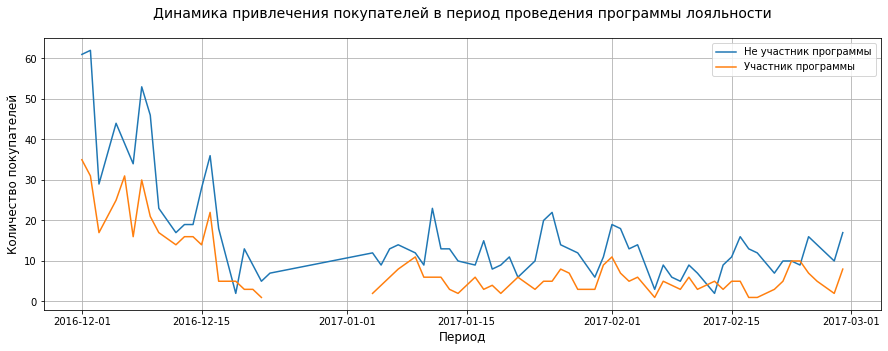

In [ ]:
# построим график, отображающий динамику привлечения покупателей в период проведения программы лояльности
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='loyalty_program',  # тип участия в программе
    values='customer_id',  # ID покупателей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.title('Динамика привлечения покупателей в период проведения программы лояльности', pad=20, fontsize=14)
plt.legend(['Не участник программы', 'Участник программы'])
plt.xlabel("Период", fontsize=12)
plt.ylabel("Количество покупателей", fontsize=12)

plt.show()

Покупательская активность по программе лояльности стабильно ниже обычных продаж. Также видим, что участники программы не совершали покупки в период перед новым годом и после.


Теперь посмотрим на количество уникальных покупателей в разрезе периодов: день/неделя/месяц

In [ ]:
# объединим таблицы retail и product_m и назовем ее total
total = retail.merge(product_m, on='product_id')

# добавим столбец с выручкой
total['revenue'] =  total['quantity']*total['price_per_one']

total.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,dt,weekday,month,year_week,rating_rank,price_per_one,revenue
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,False,2016-12-10,5,2016-12-01,2016-49,2,1.63,17.93
1,541104,21873,0,2017-01-13 14:29:00,0.0,Shop 0,False,2017-01-13,4,2017-01-01,2017-02,6,1.63,0.00
2,540418,21873,1,2017-01-07 11:04:00,0.0,Shop 0,False,2017-01-07,5,2017-01-01,2017-01,5,1.63,1.63
3,541516,21873,2,2017-01-18 17:34:00,0.0,Shop 0,False,2017-01-18,2,2017-01-01,2017-03,7,1.63,3.26
4,541566,21873,35,2017-01-19 11:50:00,23401.0,Shop 0,True,2017-01-19,3,2017-01-01,2017-03,7,1.63,57.05


In [ ]:
# посмотрим на активность покупателей вне программы
loyalty_0 = total[total['loyalty_program']==0]

# выделяем год, номер месяца, номер недели и дату
loyalty_0['purchase_year'] = loyalty_0['purchase_date'].dt.year
loyalty_0['purchase_month'] = loyalty_0['purchase_date'].dt.month
loyalty_0['purchase_week'] = loyalty_0['purchase_date'].dt.isocalendar().week
loyalty_0['purchase_date_d'] = loyalty_0['purchase_date'].dt.date

<ipython-input-48-47e50c705020>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-47e50c705020>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-47e50c705020>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-47e50c7

In [ ]:
days_customer_unique_0 = (
    loyalty_0.groupby('purchase_date_d').agg({'customer_id': 'nunique'}).mean()
)

week_customer_unique_0 = (
    loyalty_0.groupby(['purchase_year', 'purchase_week'])
    .agg({'customer_id': 'nunique'})
    .mean()
)

month_customer_unique_0 = (
    loyalty_0.groupby(['purchase_year', 'purchase_month'])
    .agg({'customer_id': 'nunique'})
    .mean()
)

print('количество уникальных покупателей в день - {}'.format(int(days_customer_unique_0)))
print('количество уникальных покупателей в неделю - {}'.format(int(week_customer_unique_0)))
print('количество уникальных покупателей в месяц - {}'.format(int(month_customer_unique_0)))

количество уникальных покупателей в день - 31
количество уникальных покупателей в неделю - 149
количество уникальных покупателей в месяц - 524


In [ ]:
# посмотрим на активность покупателей вне программы
loyalty_1 = total[total['loyalty_program']==1]

# выделяем год, номер месяца, номер недели и дату
loyalty_1['purchase_year'] = loyalty_1['purchase_date'].dt.year
loyalty_1['purchase_month'] = loyalty_1['purchase_date'].dt.month
loyalty_1['purchase_week'] = loyalty_1['purchase_date'].dt.isocalendar().week
loyalty_1['purchase_date_d'] = loyalty_1['purchase_date'].dt.date

<ipython-input-50-e7fd5f4eac54>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-e7fd5f4eac54>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-e7fd5f4eac54>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-e7fd5f4

In [ ]:
days_customer_unique_1 = (
    loyalty_1.groupby('purchase_date_d').agg({'customer_id': 'nunique'}).mean()
)

week_customer_unique_1 = (
    loyalty_1.groupby(['purchase_year', 'purchase_week'])
    .agg({'customer_id': 'nunique'})
    .mean()
)

month_customer_unique_1 = (
    loyalty_1.groupby(['purchase_year', 'purchase_month'])
    .agg({'customer_id': 'nunique'})
    .mean()
)

print('количество уникальных пользователей в день - {}'.format(int(days_customer_unique_1)))
print('количество уникальных пользователей в неделю - {}'.format(int(week_customer_unique_1)))
print('количество уникальных пользователей в месяц - {}'.format(int(month_customer_unique_1)))

количество уникальных пользователей в день - 15
количество уникальных пользователей в неделю - 77
количество уникальных пользователей в месяц - 270


Обычных покупателей, не участвующих в программе лояльности, в два раза больше как в день так и в неделю и месяц.

## Исследование торговых точек

In [ ]:
# посмотрим сколько всего ТТ вошло в анализ
shop_id_cnt = retail['shop_id'].nunique()
'Всего торговых точек: {}'.format(shop_id_cnt)

'Всего торговых точек: 31'

In [ ]:
# посмотрим в скольких ТТ совершались покупки по программе лояльности
loyalty_shop = list(retail[retail.loyalty_program==1]['shop_id'].value_counts()[:35].index)
loyalty_shop

['Shop 0', 'Shop 8', 'Shop 19', 'Shop 28']

Всего в 4х магазинах из 31 совершались покупки по программе лояльности.

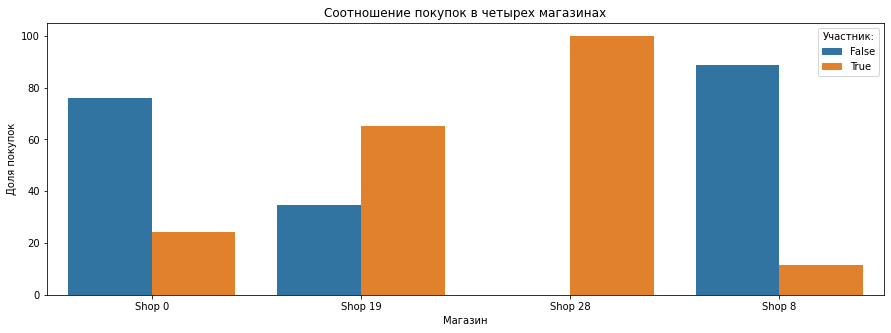

In [ ]:
# посмотрим на ссотношение покупок в выявленных четырех магазинах
t = retail.groupby(['shop_id', 'loyalty_program'])['purchase_id'].agg('count').reset_index()
t=t.query('index in [0,1,31,32,12,13,23]')
t['total'] = [94580,94580,72,72, 30, 553, 553]
t['ratio'] = t['purchase_id']/t['total']*100

# строим график
plt.figure(figsize=(15, 5))

ax = sns.barplot(x='shop_id', 
                 y='ratio', 
                 hue='loyalty_program', 
                 data=t
                 )

plt.title('Соотношение покупок в четырех магазинах')
plt.ylabel('Доля покупок')
plt.xlabel('Магазин')
plt.legend(title='Участник:')

plt.show()

В магазинах Shop 0 и Shop 8 преобладают простые покупки, в магазине Shop 19 - наоборот, преобладают покупки по программе лояльности. А в магазине Shop 28 - 100% покупок по программе лояльности.

In [ ]:
# посмотрим TOP-10 магазинов по трафику (количество уникальных покупателей в разрезе ТТ)
customer_id_cnt = (retail.groupby('shop_id')['customer_id'].agg('nunique').sort_values(ascending=False).reset_index())
customer_id_cnt.head(10)


,shop_id,customer_id
0,Shop 0,1513
1,Shop 4,41
2,Shop 1,38
3,Shop 8,11
4,Shop 12,10
5,Shop 10,8
6,Shop 7,7
7,Shop 2,7
8,Shop 11,5
9,Shop 18,5


In [ ]:
# строим столбчатую диаграмму 
fig = px.bar(customer_id_cnt.head(10).sort_values(by='customer_id', ascending=True), # загружаем данные и заново их сортируем
             x='customer_id', # указываем столбец с данными для оси X
             y='shop_id', # указываем столбец с данными для оси Y
             text='customer_id' # добавляем аргумент, который отобразит текст с информацией
                                # о количестве объявлений внутри столбца графика
            )
# оформляем график
fig.update_layout(title='TOP-10 магазинов по трафику ',
                   xaxis_title='Количество уникальных покупателей',
                   yaxis_title='Магазин')

# выводим график
fig.show() 


In [ ]:
# посмотрим TOP-10 магазинов по объему продаж (сколько всего единиц товара и сколько уникальных единиц товара продано в разрезе ТТ)
product_id_cnt = (retail.groupby('shop_id')['product_id'].agg(['count','nunique']).sort_values(by='nunique', ascending=False).reset_index())
product_id_cnt.head(10)


,shop_id,count,nunique
0,Shop 0,94580,3093
1,Shop 4,1585,694
2,Shop 6,977,631
3,Shop 1,1513,588
4,Shop 8,553,388
5,Shop 3,490,296
6,Shop 7,310,256
7,Shop 18,254,229
8,Shop 10,291,202
9,Shop 2,247,201


In [ ]:
# строим столбчатую диаграмму 
fig = px.bar(product_id_cnt.head(10).sort_values(by='nunique', ascending=True), # загружаем данные и заново их сортируем
             x='nunique', # указываем столбец с данными для оси X
             y='shop_id', # указываем столбец с данными для оси Y
             text='nunique' # добавляем аргумент, который отобразит текст с информацией
                                # о количестве объявлений внутри столбца графика
            )
# оформляем график
fig.update_layout(title='TOP-10 магазинов по объему продаж ',
                   xaxis_title='Количество проданного товара (уникальных единиц)',
                   yaxis_title='Магазин')

# выводим график
fig.show() 


Самый высокий трафик в магазине "Shop 0", по нему также видим и самое большое количество проданного товара (уникальных единиц). Скорее всего это магазин формата гипермаркет и является центральным в Сети. Далее идет магазин "Shop 4". В целом картина по трафику и объему продаж сходится.

## Исследование параметров товара

In [ ]:
# посмотрим количество уникального товара в продаже
product_id_cnt = retail['product_id'].nunique()
'Всего товарных наименований: {}'.format(product_id_cnt)

'Всего товарных наименований: 3101'

In [ ]:
# посмотрим на соотношение проданного товара по программе лояльности и без
product_l = (retail.groupby(['product_id', 'loyalty_program'])['quantity'].agg('sum').head(15).sort_values(ascending=False).reset_index())


# построим график
fig = go.Figure(data=[go.Pie(labels=product_l['loyalty_program'], # указываем значения, которые появятся на метках сегментов
                            values=product_l['quantity'], # указываем данные, которые отобразятся на графике
                            pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Соотношение проданного товара', # указываем заголовок графика
                 width=500, # указываем размеры графика
                 height=500,
                 annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                   y=1.05,
                                   text='Продано по программе лояльности:',
                                   showarrow=False)])
fig.show() # выводим график

В рамках программы лояльности было продано всего 23% товаров от общего товарооборота.

## Исследование факторов, влияющих на покупку

In [ ]:
# проверим зависимость между участием в программе лояльности и количеством проданного товара
total['loyalty_program'].corr(total['quantity'])

0.019963540500889363

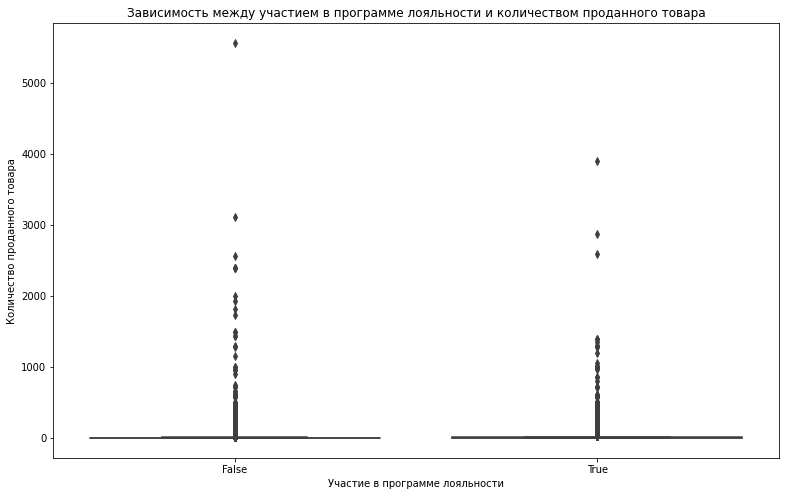

In [ ]:
# построим график
plt.figure(figsize=(13, 8))
sns.boxplot(x='loyalty_program', y='quantity', data=total)

plt.xlabel('Участие в программе лояльности')
plt.ylabel('Количество проданного товара')
plt.title('Зависимость между участием в программе лояльности и количеством проданного товара');

Зависимость между участием в программе лояльности и количеством проданного товара слабая, можем сказать о том, что участие в программе сильно не влияет на увеличение товара в корзине покупателя.

In [ ]:
# проверим зависимость между участием в программе лояльности и выручкой
total['loyalty_program'].corr(total['revenue'])

0.01463179223817345

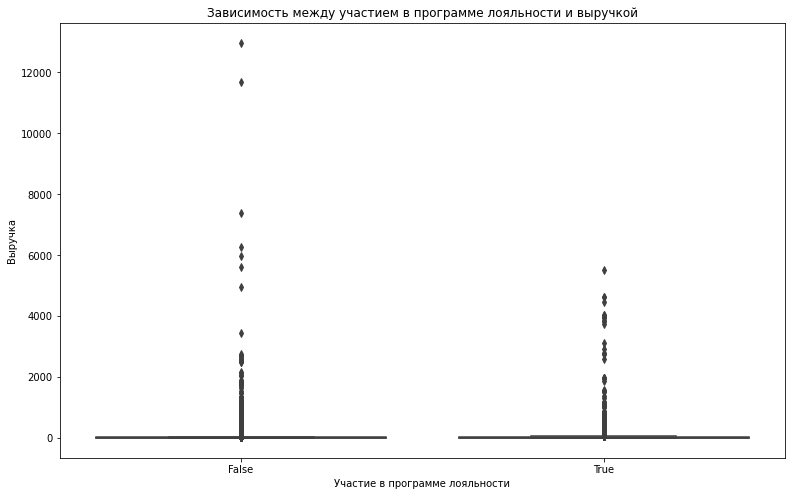

In [ ]:
# построим график
plt.figure(figsize=(13, 8))
sns.boxplot(x='loyalty_program', y='revenue', data=total)

plt.xlabel('Участие в программе лояльности')
plt.ylabel('Выручка')
plt.title('Зависимость между участием в программе лояльности и выручкой');

Зависимость между участием в программе лояльности и выручкой также слабая, также здесь видим, что выручка по программе лояльности не растет. Это может говорить о том, что покупатели, участвующие в программе лояльности, не ориентируются на более дорогой товар, как возможно ожидалось от программы.

In [ ]:
# проверим зависят ли продажи от месяца
month_pivot = total.pivot_table(index='month',values='revenue',aggfunc='sum')
month_pivot

,revenue
month,
2016-12-01,907734.25
2017-01-01,774668.94
2017-02-01,640210.72


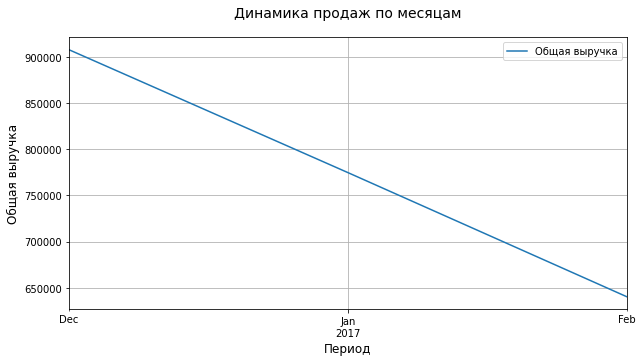

In [ ]:
# проверим зависят ли продажи от месяца
month_pivot = total.pivot_table(index='month',values='revenue',aggfunc='sum').plot(grid=True, figsize=(10, 5))
plt.title('Динамика продаж по месяцам', pad=20, fontsize=14)
plt.legend(['Общая выручка'])
plt.xlabel("Период", fontsize=12)
plt.ylabel("Общая выручка", fontsize=12);

Предполагаю, что розничная торговля в сфере строительства подвержена сезонным колебаниям. Декабрь имеет самую высокую выручку из трех месяцев в наших данных. Далее Январь -15% к Декабрю, Февраль -18% к Январю. По всей видимости Новогодний период для сферы строительства - период затишья.

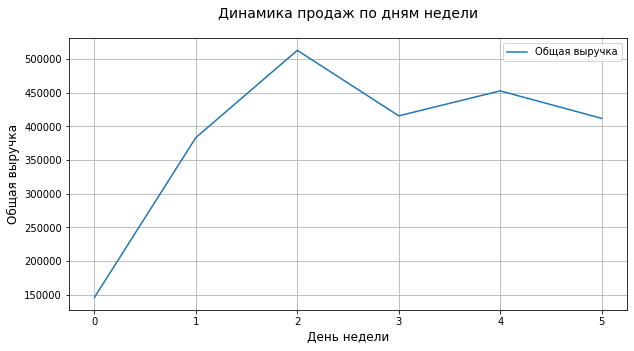

In [ ]:
# проверим зависят ли продажи от дня недели
weekday_pivot = total.pivot_table(index='weekday',values='revenue',aggfunc='sum').plot(grid=True, figsize=(10, 5))
plt.title('Динамика продаж по дням недели', pad=20, fontsize=14)
plt.legend(['Общая выручка'])
plt.xlabel("День недели", fontsize=12)
plt.ylabel("Общая выручка", fontsize=12);


Активность покупателей проявляется со Вт, пик приходится на Ср, далее постепенный спад

В данном разделе получена следующая информация:
- временные рамки исследования: начало - 2016-12-01, конец - 2017-02-28
- всего уникальных покупателей: 1682, из них 34% (565 человек) являются участниками программы лояльности. Также участники программы не совершали покупки в период перед новым годом и после.
- всего торговых точек: 31, из них только в 4х совершались покупки по программе лояльности
- TOP-10 магазинов по трафику
- TOP-10 магазинов по объему продаж
- всего товарных единиц: 3101, из них только 23% было реализовано по программе лояльности
- зависимость между участием в программе лояльности и количеством проданного товара/выручкой слабая
- падение выручки: Январь к Декабрю -15%, Февраль к Январю -18%

# 5. Анализ основных ритейл-метрик

## Расчет выручки

In [ ]:
# посчитаем общую выручку за весь период для простых покупателей
revenue_for_0 = total[total['loyalty_program']==0]
revenue_for_0['revenue'].sum().round()

1731193.0

In [ ]:
# посчитаем выручку за весь период для участников программы лояльности
revenue_for_1 = total[total['loyalty_program']==1]
revenue_for_1['revenue'].sum().round()

591421.0

In [ ]:
# посмотрим на рейтинг ТОП-10 ТТ по общей выручке
top_10_shop_of_revenue = total.pivot_table(index='shop_id',values='revenue',aggfunc='sum').sort_values(by='revenue', ascending=False).reset_index()
top_10_shop_of_revenue.head(10)


,shop_id,revenue
0,Shop 0,1886814.695
1,Shop 3,102070.050
2,Shop 6,62409.140
3,Shop 4,53748.865
4,Shop 1,48615.330
5,Shop 2,39523.415
6,Shop 14,22346.055
7,Shop 8,17188.245
8,Shop 19,11299.830
9,Shop 7,11271.100


In [ ]:
# строим столбчатую диаграмму 
fig = px.bar(top_10_shop_of_revenue.head(10).sort_values(by='revenue', ascending=True), # загружаем данные и заново их сортируем
             x='revenue', # указываем столбец с данными для оси X
             y='shop_id', # указываем столбец с данными для оси Y
            )
# оформляем график
fig.update_layout(title='Общая выручка за три месяца',
                   xaxis_title='Выручка',
                   yaxis_title='Магазин')

# выводим график
fig.show() 

В ТОП-10 входят два магазина, в которых совершались покупки по программе лояльности - Shop 0 и Shop 8. При этом выручка Shop 0 больше в десятки раз.

## Расчет среднего чека

In [ ]:
# посчитаем средний чек для простых покупателей
average_check_for_0 = total[total['loyalty_program']==0]
average_check_for_0['revenue'].median()

5.1

In [ ]:
# посчитаем средний чек для участников программы лояльности
average_check_for_1 = total[total['loyalty_program']==1]
average_check_for_1['revenue'].median()

8.850000000000001

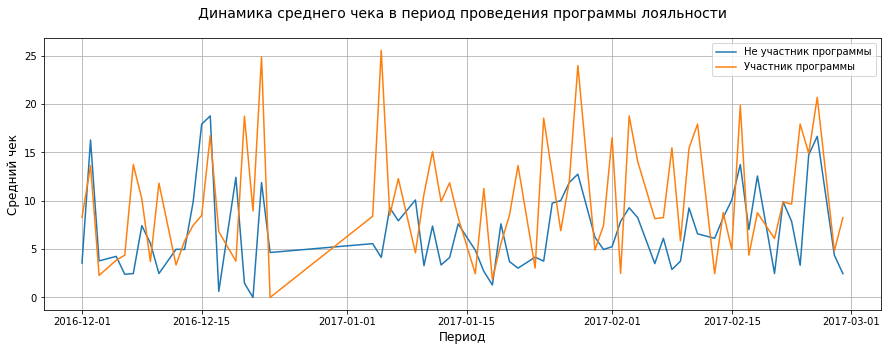

In [ ]:
# построим график, отображающий динамику среднего чека в период проведения программы лояльности
total.pivot_table(
    index='dt',  # даты 
    columns='loyalty_program',  # тип участия в программе
    values='revenue',  # ID покупателей
    aggfunc='median'  # подсчёт значений
).plot(figsize=(15, 5), grid=True)

plt.title('Динамика среднего чека в период проведения программы лояльности', pad=20, fontsize=14)
plt.legend(['Не участник программы', 'Участник программы'])
plt.xlabel("Период", fontsize=12)
plt.ylabel("Средний чек", fontsize=12)

plt.show()

Средний чек участников программы лояльности более чем на 40% выше чем у покупателей вне программы. И мы видим, что он стабильно выше.

## Определение момента и горизонта анализа

In [ ]:
# зададим горизонт анализа в неделях
horizon_days =  28

In [ ]:
# зададим момент анализа
observation_date = datetime(2017, 2, 28).date()

In [ ]:
# создаём опцию «игнорировать горизонт»
ignore_horizon = False

## Расчёт Retention Rate 

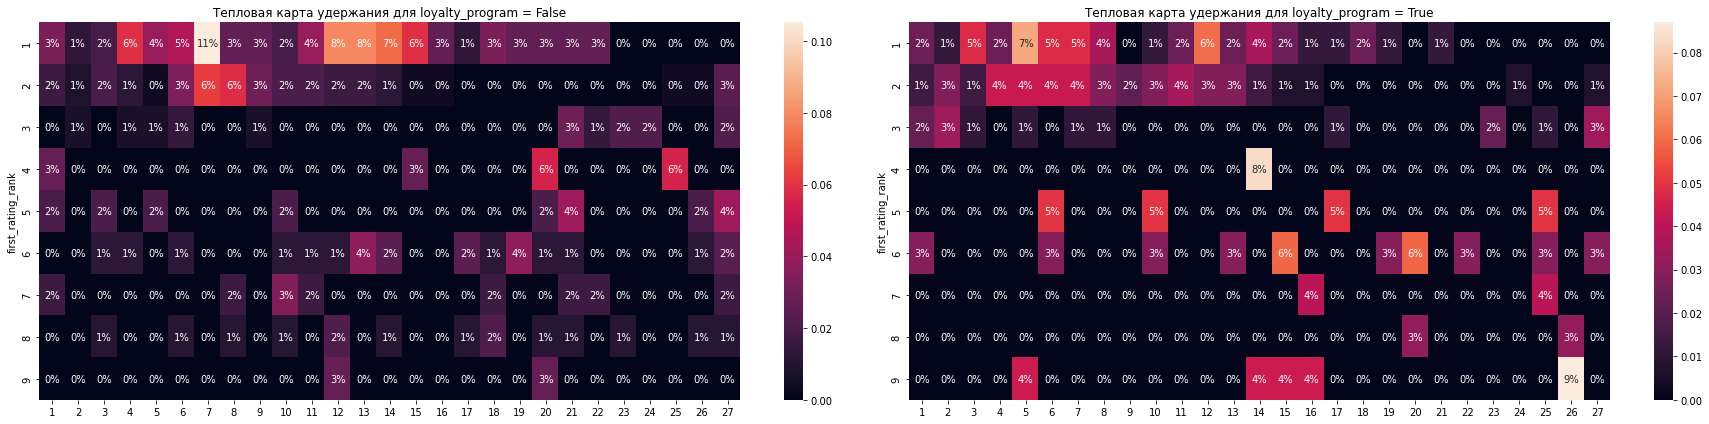

In [ ]:
# строим хитмэп
retention_raw, retention = get_retention(
    profiles, retail, observation_date, horizon_days, dimensions=['first_rating_rank']
)  # передаём параметру dimensions столбец dt

plt.figure(figsize=(25, 6)) # задаём размер сетки для графиков

for i, loyalty_program in enumerate(profiles['loyalty_program'].unique()):
    sns.heatmap(
        retention.query('loyalty_program == @loyalty_program')
        # удаляем loyalty_program из индексов, чтобы не загромождать графики
        .droplevel('loyalty_program')
        # исключаем размеры когорт и удержание первого дня
        .drop(columns=['cohort_size', 0]),
        # добавляем подписи значений
        annot=True,
        # переводим значения в проценты
        fmt='.0%',
        # строим каждый график в своей ячейке
        ax=plt.subplot(1, 2, i + 1),
    )
    # задаём названия графиков с учётом значения payer
    plt.title('Тепловая карта удержания для loyalty_program = {}'.format(loyalty_program))

plt.tight_layout()  # «подгоняем» размер графиков, чтобы уместились подписи
plt.show()

Процент удержания покупателей, участвующих в программе лояльности в целом выше чем у обычных покупателей. 

## Расчет LTV (общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок)

In [ ]:
# преобразуем данные о времени для дальнейших расчётов
profiles['first_purchase_date'] = pd.to_datetime(profiles['first_purchase_date'])
profiles['dt'] = pd.to_datetime(profiles['dt']).dt.date
total['purchase_date'] = pd.to_datetime(total['purchase_date'])

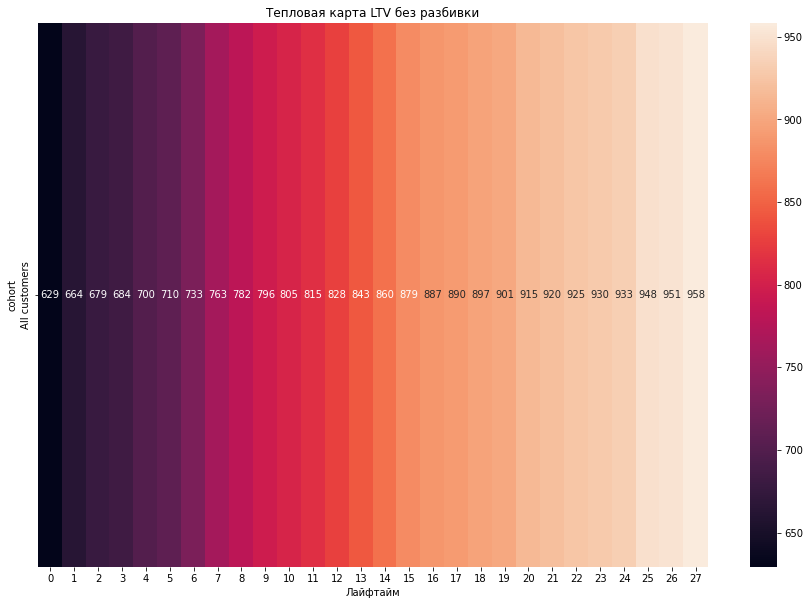

In [ ]:
# построим тепловую карту по таблице LTV.
ltv_raw, ltv, ltv_history = get_ltv(profiles, total, observation_date, horizon_days)

plt.figure(figsize=(15, 10)) # задаём размер сетки для графиков

sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='.0f')
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

Месячный LTV покупателей составил 958 руб.

In [ ]:
# таблица с участниками
# фильтруем таблицу по участникам программы лояльности
loyalty_customer = total[total['loyalty_program']== True]

# выделяем размеры когорт
loyalty_customer = loyalty_customer.groupby(['month', 'loyalty_program'], as_index=False).agg({'customer_id':'nunique', 'revenue':'sum'})

# добавим по 200 рублей за каждого участника, оплатившего участие в программе лояльности
loyalty_customer['new_revenue'] = loyalty_customer['revenue'] + (loyalty_customer['customer_id'] * 200)


# таблица с не участниками
# фильтруем таблицу по не участникам программы лояльности
non_loyalty_customer = total[total['loyalty_program']== False]

# выделяем размеры когорт
non_loyalty_customer = non_loyalty_customer.groupby(['month', 'loyalty_program'], as_index=False).agg({'customer_id':'nunique', 'revenue':'sum'})
non_loyalty_customer['new_revenue'] = non_loyalty_customer['revenue']
c = pd.concat([loyalty_customer, non_loyalty_customer], axis=0)
c


,month,loyalty_program,customer_id,revenue,new_revenue
0,2016-12-01,True,322,249957.38,314357.38
1,2017-01-01,True,230,151422.20,197422.20
2,2017-02-01,True,260,190041.10,242041.10
0,2016-12-01,False,564,657776.87,657776.87
1,2017-01-01,False,511,623246.74,623246.74
2,2017-02-01,False,499,450169.62,450169.62


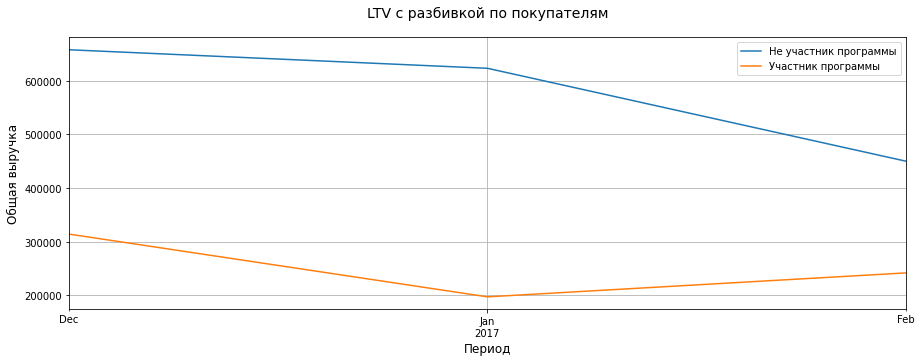

In [ ]:
# строим кривые LTV
c.pivot_table(
    index='month',  # даты первых посещений
    columns='loyalty_program',  # тип участия в программе
    values='new_revenue',  # ID покупателей
    aggfunc='sum'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.title('LTV с разбивкой по покупателям', pad=20, fontsize=14)
plt.legend(['Не участник программы', 'Участник программы'])
plt.xlabel("Период", fontsize=12)
plt.ylabel("Общая выручка", fontsize=12)

plt.show()


Согласно графику LTV обычные покупатели приносят Сети больше выручки, даже при том, что участники платят по 200 руб каждый месяц за участие.Но обратим внимание, что с января 2017 ситуация поправляется, выручка участников программы растет, а простых покупателей падает.

В данном разделе мы обнаружили:
- в целом общая выручка от продаж в рамках программы лояльности ниже, но с Января видна положительная динамика - есть "отклик покупателя"
- средний чек участников программы лояльности стабильно выше чем у покупателей вне программы. 
- процент удержания покупателей, участвующих в программе лояльности в целом выше чем у обычных покупателей.
- месячный LTV покупателей составил 958 руб.

# 6. Проверка гипотез 

Так как мы имеем большой объем выборки выберем пониженный уровень значимости 0,01.

## Гипотеза №1

- H0 - средний чек "участника" **равен** среднему чеку "не участника". 
- H1 - средний чек "участника" **не равен** среднему чеку "не участника". 

In [ ]:
# проверим гипотезы
loyalty_rev_0 = loyalty_0.groupby('purchase_id')['revenue'].median()
loyalty_rev_1 = loyalty_1.groupby('purchase_id')['revenue'].median()

results = st.ttest_ind(loyalty_rev_0, loyalty_rev_1)

alpha = 0.01 

print(results.pvalue)

if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')


0.6752437006949326
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 67,5%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками.

## Гипотеза №2

- H0 - количество товаров в корзине "участника" **равно** количеству товаров "не участника". 
- H1 - количество товаров в корзине "участника" **не равно** количеству товаров "не участника". 

In [ ]:
# проверим гипотезы
loyalty_quan_0 = loyalty_0.groupby('purchase_id')['quantity'].count()
loyalty_quan_1 = loyalty_1.groupby('purchase_id')['quantity'].count()

# проверим гипотезу
results = st.ttest_ind(loyalty_quan_0,loyalty_quan_1)

alpha = 0.01 

print(results.pvalue)

if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

6.609452452564791e-06
Отвергаем нулевую гипотезу


Количество товара в корзине покупателя, участвовавшего в программе лояльности больше чем в корзине простого покупателя.

# 7. Вывод и рекомендации

Исходя из полученных данных и проведенной обработки информации

**Вывод:**
- всего 34% (это 565 человек из 1682) покупателей Сети стали участниками программы лояльности; 
- покупательская активность участников программы стабильно ниже обычных продаж;
- всего в 4х магазинах из 31 совершались покупки по программе лояльности, и их доля занимает наименьшую долю - от 11% до 34%
- в рамках программы лояльности было продано всего 23% товаров от общего товарооборота
- нет прямой зависимости между проведением программы и увеличением товарооборота
- активность покупателей приходится на середину недели - со Вт
- средний чек участников программы лояльности более чем на 40% выше чем у покупателей вне программы
- количество товаров в корзине "участника" больше количества товаров "не участника"
- процент удержания покупателей, участвующих в программе лояльности в целом выше чем у обычных покупателей
- LTV покупателей, участвующих в программе лояльности в целом ниже чем у обычных покупателей, но имеется тренд на рост с Января месяца
- регулярность покупок как у участвующих покупателей так и у не участвующих практически одинаковая

**Рекомендации:**
- большая часть покупателей отказалась от участия или еще не приняла решение. Возможно стоит пересмотреть методы коммуникации с конечным покупателем, как доводится информация о выгодах участия в программе. Либо пересмотреть акционный набор. В целом средний чек у участников программы выше чем у обычных, поэтому потенциал у программы есть.
- розничная торговля в сфере строительства подвержена сезонным колебаниям, также новогодний период для данной сферы очевидно является периодом затишья. Для проведения исследования по работоспособности программы желательно выбирать более нейтральный период.


**Описание шагов исследования:**

1. Загрузка данных и подготовка их к анализу
- обзор данных

2. Предобработка данных
- анализ выбросов и аномалий в данных
- обработка пропусков
- изменение типов данных
- обработка названий столбцов
- обработка дубликатов
- дополнительные столбцы
- проверка изменений

3. Функции для расчета и визуализации метрик
- Функция для создания пользовательских профилей
- функция для расчета удержания
- функция для расчета LTV

4. Исследовательский анализ данных
- определение периода исследования;


- исследование профиля покупателя:
  - общее количество уникальных покупателей
  - соотношение участник/не участник программы лояльности


- исследование торговых точек:
  - общее количество магазинов
  - в каких магазинах осуществлялись покупки участниками программы лояльности
  - соотношение участвующих/не участвующих в программе лояльности покупателей в данных магазинах,
  - количество покупок по каждой ТТ,
  - количество проданного товара в каждой ТТ
  
  
- исследование параметров товара:
  - соотношение товара проданного в период проведения программы


- исследование факторов, влияющих на покупку:
  - зависимость участник/не участник программы лояльности и количество купленного товара
  - зависимость участник/не участник программы лояльности и стоимость купленного товара
  - зависимость активности покупателей от периода (месяц/день недели)
  
5. Анализ основных ритейл-метрик
- расчет выручки, 
- расчет среднего чека, 
- расчет retantion rate, 
- расчет LTV, 
- расчет dau/mau/wau, 
- расчет sticky factor


6. Проверка гипотез 
- проверка гипотезы 1: средние чеки покупателей "участник" и "не участник" различаются. Н0 - средний чек "участника" равен среднему чеку "не участника". 
- проверка гипотезы 2: количество товаров в корзине покупателей "участник" и "не участник" различаются. Н0 - количество товаров в корзине "участника" равно количеству товаров "не участника".

7. Вывод и рекомендации
- зафиксировать основной вывод проведённого исследования и дать рекомендации менеджеру проекта по внедрению программы на всю сеть магазинов.